In [2]:
import gym
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [3]:
env = gym.make("CartPole-v1")

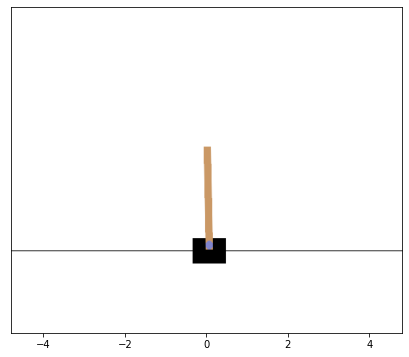

In [5]:
# SHOW A FRAME
env.reset()
frame = env.render(mode='rgb_array')

fig, ax = plt.subplots(figsize=(8, 6))
ax.axes.yaxis.set_visible(False)
min_x = env.observation_space.low[0]
max_x = env.observation_space.high[0]
ax.imshow(frame, extent=[min_x, max_x, 0, 8])

In [9]:
# EXPLORE STATE SPACE
x_min, v_min, angle_min, angular_v_min = env.observation_space.low
x_max, v_max, angle_max, angular_v_max = env.observation_space.high

print(f'Cart position from {x_min:.2f} to {x_max:.2f}')
print(f'Cart velocity from {v_min:.2E} to {v_max:.2E}')
print(f'Angle from {angle_min:.2f} to {angle_max:.2f}')
print(f'Angular velocity from {angular_v_min:.2E} to {angular_v_max:.2E}')

Cart position from -4.80 to 4.80
Cart velocity from -3.40E+38 to 3.40E+38
Angle from -0.42 to 0.42
Angular velocity from -3.40E+38 to 3.40E+38


#### ENVIRONMENT, ACTIONS, STATES, REWARDS

![](./reinforcement_learning_course/pau_bajo_course/cartpole_image.jpeg)

### <ins>State</ins>

State is represented by 4 values shown above:

 - the cart position **x** from `-2.4` to `2.4`
 - the cart velocity **v**
 - the pole angle $\theta$ with respect to the vertical. From `-12` to `12` degrees (`-0.21` to `0.21` in radians)
 - the pole angular velocity $\omega$. This is the rate of change of $\theta$

 ### <ins>Episode starts and ends</ins>

An episode terminates when either:

 - the cart goes beyond the limits: `x > 2.4` or x `< -2.4`
 - the pole is too far from the vertical: `θ > 12` degrees or `θ < -12` degrees.
 - or we reached the maximum number of episodes steps, `500`. In this case, the agent perfectly solved the episode.

The starting state is sampled randomly from the interval `[-0.05, 0.05]` for each state. Sometimes, the starting position is so close to balance that the episode is easy. Other times, the starting position is so off-balance that the episode is much harder to solve, and sometimes even impossible.

### <ins>Actions</ins>

What about the **actions** our agent can perform?
 - 0 : Push the cart to the left.
 - 1 : Push the cart to the right.

### <ins>Rewards</ins>
The reward is `+1` for every step taken. This means that the longer the agent keeps the pole standing, the higher the cumulative reward.



In [19]:
# SEE INTERACTION BETWEEN TWO STATES AND AN ACTION
# OLD STATE PLUS A STEP ACCORDING TO AN ACTION GENERATED NEW STATE AND REWARD

old_state = env.reset()
env.state = old_state
print(f"old_state: {old_state}")  # old_state: [-0.01298927 -0.04985128 -0.0408152  -0.04901766]

random_action = env.action_space.sample()
print(f"random_action: {random_action}") # random_action: 1

next_state, reward, done, info = env.step(random_action)

print(f"next_state: {next_state}") # next_state: [-0.01554931 -0.18837169  0.0489684   0.35493335]
# here next_state is a list [x, v, theta, omega]
print(f"reward: {reward}") # reward: 1.0
print(f"done: {done}") # done: False
print(f"info: {info}") # info: {}


old_state: [-0.03781126  0.04057393  0.0331523  -0.02027966]
random_action: 0
next_state: [-0.03699978 -0.15500739  0.0327467   0.2826761 ]
reward: 1.0
done: False
info: {}


In [32]:
# CREATE RANDOM PLAYER
episodes = 10



def Random_games(episodes):
    '''
    this function takes a number of episodes, randomly initialises the cartpole environment and then picks random actions up to a max of 500 goes to see how it does,
    '''
    # Each of this episode is its own game.
    max_t = 0

    for episode in range(episodes):
        
        #initialises the environment radomly
        env.reset()
        
        # this is each frame, up to 500 (which is max value of steps)...but we wont make it that far with random.
        for t in range(500):

            # This will display the environment
            # Only display if you really want to see it.
            # Takes much longer to display it.
            env.render()
            
            # This will just create a sample action in any environment. it just picks randomly between the poss actions, in this case 0 or 1
            # In this environment, the action can be 0 or 1, which is left or right
            action = env.action_space.sample()

            # this executes the environment with an action, 
            # and returns the observation of the environment, 
            # the reward, if the env is over, and other info.
            next_state, reward, done, info = env.step(action)
            
            # lets print everything in one line:
            print(t, next_state, reward, done, info, action)

            if done:
                if t > max_t:
                    max_t = t
                break
    print(f"max_t: {max_t}")

In [33]:
Random_games(10) # max_t = 45 = not great

0 [ 0.03391917 -0.18016492 -0.0390009   0.27300513] 1.0 False {} 0
1 [ 0.03031587  0.0154912  -0.03354079 -0.03171922] 1.0 False {} 1
2 [ 0.03062569  0.21107769 -0.03417518 -0.3347931 ] 1.0 False {} 1
3 [ 0.03484724  0.01645836 -0.04087104 -0.05308012] 1.0 False {} 0
4 [ 0.03517641  0.2121418  -0.04193264 -0.3583729 ] 1.0 False {} 1
5 [ 0.03941925  0.01764027 -0.0491001  -0.07920165] 1.0 False {} 0
6 [ 0.03977205 -0.17674468 -0.05068414  0.19759475] 1.0 False {} 0
7 [ 0.03623716  0.01906421 -0.04673224 -0.11063616] 1.0 False {} 1
8 [ 0.03661845 -0.17535803 -0.04894496  0.16694452] 1.0 False {} 0
9 [ 0.03311128  0.02042913 -0.04560607 -0.14076857] 1.0 False {} 1
10 [ 0.03351986 -0.17401098 -0.04842144  0.13718478] 1.0 False {} 0
11 [ 0.03003965 -0.36840716 -0.04567775  0.41420692] 1.0 False {} 0
12 [ 0.0226715  -0.5628529  -0.03739361  0.6921467 ] 1.0 False {} 0
13 [ 0.01141445 -0.75743663 -0.02355067  0.97282714] 1.0 False {} 0
14 [-0.00373429 -0.9522348  -0.00409413  1.2580202 ] 1.0 F

### <ins>USE KERAS / NEURAL NET</ins>

In [35]:
from keras.models import Model
from keras.layers import Input, Dense
# from keras.optimizers import Adam, RMSprop
from tensorflow import keras
from tensorflow.keras import layers

# # Neural Network model for Deep Q Learning
# def OurModel(input_shape, action_space):

#     X_input = Input(input_shape)

#     # 'Dense' is the basic form of a neural network layer
#     # Input Layer of state size(4) and Hidden Layer with 512 nodes
#     X = Dense(512, input_shape=input_shape, activation="relu", kernel_initializer='he_uniform')(X_input)

#     # Hidden layer with 256 nodes
#     X = Dense(256, activation="relu", kernel_initializer='he_uniform')(X)
    
#     # Hidden layer with 64 nodes
#     X = Dense(64, activation="relu", kernel_initializer='he_uniform')(X)

#     # Output Layer with # of actions: 2 nodes (left, right)
#     X = Dense(action_space, activation="linear", kernel_initializer='he_uniform')(X)

#     model = Model(inputs = X_input, outputs = X, name='CartPole DQN model')
    
#     model.compile(loss="mse", optimizer=RMSprop(lr=0.00025, rho=0.95, epsilon=0.01), metrics=["accuracy"])

#     model.summary()
    
#     return model



def OurModel(input_shape, action_space):
    
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'),
        layers.Dense(256, activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'),
        layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(action_space, activation='linear', kernel_initializer='he_uniform'),
    ],  )
    
    model.compile(
        optimizer = keras.optimizers.RMSprop
        (
            learning_rate=0.00016, 
            # decay = 0.001,
            rho=0.95, 
            epsilon=0.01
        ), 
        metrics=["accuracy"],
        loss='mse',
    )
    
    model.summary()
    return model

For a NN to understand and predict based on the environment data, we have initialized our model (will show it in original code) and feed it the information. Then the model will train on those data to approximate the output based on the input. Later in the complete code, you will see that the `fit()` method provides input and output pairs to the model.

In the above model, I used three layers of Neural Network, `512, 256, and 64` neurons. Feel free to play with its structure and parameters.

Later in the training process, you will see what makes the NN predict the reward value from a particular state. You will see that in code, I will use `model.fit(next_state, reward)`, same as in the standard Keras NN model.

After training, the model we will be able to predict the output from unseen input. When we call `predict()` function on the model, the model will predict the reward of the current state based on the data we trained. Like so: `prediction = model.predict(next_state)`

### <ins>Implimenting Deep Q Network</ins>

Generally, in games, the reward directly relates to the score of the game. But, imagine a situation where the pole from the CartPole game is tilted to the left. The expected future reward of pushing the left button will then be higher than that of pushing the right button since it could yield a higher score of the game as the pole survives longer.

To logically represent this intuition and train it, we need to express this as a formula to optimize. The loss is just a value that indicates how far our prediction is from the actual target. For example, the model's prediction could suggest more value in pushing the left button to gain more reward by pressing the right button. We want to decrease this gap between the prediction and the target (loss). So, we will define our loss function as follows:

![](loss.png)


We first act `a` and observe the reward `r` and resulting new state `s'`. Based on the result, we calculate the maximum target `Q(s', a')` and then discount it to make the future reward worth less than the immediate reward. Lastly, we add the current reward to the discounted future reward to get the target value. Subtracting our current prediction from the target gives the loss. Squaring this value allows us to punish the large loss value more and treat the negative values as positive ones.

But it's not that difficult than you think it is; Keras takes care of most of the difficult tasks for us. 

We need to **define our target**. 

We can express the target in a magical one line of code in python: `target = reward + gamma * np.max(model.predict(next_state))`

Keras does all the work of subtracting the target from the NN output and squaring it. It also applies the learning rate that we can define when creating the neural network model (otherwise, the model will determine it by itself); all this happens inside the `fit()` function. 

This function decreases the gap between our prediction to target by the learning rate. The approximation of the Q-value converges to the true Q-value as we tend to repeat the change method. The loss decreases, and therefore the score grows higher.

### <ins>MEMORY AND REPLAY</ins>

The most notable features of the DQN algorithm are "remembered" and "replay" methods. Both are simple concepts. The original DQN design contains a lot of tweaks for a better learning process. However, we tend to stick to a less complicated version for better understanding.

<ins>REMEMBER</ins>

One of the specific things for DQN is that the Neural Network used in the algorithm tends to forget the previous experiences as it overwrites them with new experiences. 

So, we need a memory (list) of previous experiences and observations to re-train the model with the earlier experiences. 

Experience replay could be named a biologically inspired method that uniformly (scales back the correlation between sequence actions) samples experiences from the memory and updates its Q values for every entry. We will call this array of experiences memory and use a `remember()` function to `append state, action, reward, and next state `to the memory.

In our example, the memory list will have a form of:

`memory = [(state, action, reward, next_state, done)...]`

And remember function will store states, actions, and resulting rewards to the memory like:

In [ ]:
# FOR USE IN AGENT CLASS
def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))
    if len(self.memory) > self.train_start:
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

To make the agent perform well in the long term, we need to consider the immediate rewards and the future rewards we will get. To do this, we will have a discount rate or gamma and ultimately add it to the current state reward. This way, the agent will learn to maximize the discounted future reward based on the given state. 

In other words, we are updating our `Q value` with the *cumulative discounted future rewards*.

`done` is just a Boolean that indicates if the state is the final state (cartpole failed).

<ins>REPLAY</ins>

A method that trains NN with experiences in the memory we will call replay() function. First, we will sample some experiences from the memory and call them minibatch.

` minibatch = random.sample(memory, min(len(memory), batch_size))`

The above code will make a minibatch, just randomly sampled elements from full memories of size batch_size. I will set the batch size as 64 for this example. If the memory size is less than 64, we will take everything is in our memory.

For those of you who wonder how such function can converge, as it looks like it is trying to predict its output (in some sense it is), don't worry — it's possible, and in our simple case, it does. However, convergence is not always that 'easy', and in more complex problems, there comes a need for more advanced techniques than CartPole stabilize training. For example, these techniques are Double DQN's or Dueling DQN's, but that's a topic for another article (stay tuned).

In [ ]:
# FOR USE IN AGENT CLASS

def replay(self):
    if len(self.memory) < self.train_start:
        return
    # Randomly sample minibatch from the memory
    minibatch = random.sample(self.memory, min(len(self.memory), self.batch_size))

    state = np.zeros((self.batch_size, self.state_size))
    next_state = np.zeros((self.batch_size, self.state_size))
    action, reward, done = [], [], []

    # do this before prediction
    # for speedup, this could be done on the tensor level
    # but easier to understand using a loop
    for i in range(self.batch_size):
        state[i] = minibatch[i][0]
        action.append(minibatch[i][1])
        reward.append(minibatch[i][2])
        next_state[i] = minibatch[i][3]
        done.append(minibatch[i][4])

    # do batch prediction to save speed
    target = self.model.predict(state)
    target_next = self.model.predict(next_state)

    for i in range(self.batch_size):
        # correction on the Q value for the action used
        if done[i]:
            target[i][action[i]] = reward[i]
        else:
            # Standard - DQN
            # DQN chooses the max Q value among next actions
            # selection and evaluation of action is on the target Q Network
            # Q_max = max_a' Q_target(s', a')
            target[i][action[i]] = reward[i] + self.gamma * (np.amax(target_next[i]))

    # Train the Neural Network with batches
    self.model.fit(state, target, batch_size=self.batch_size, verbose=0)

<ins>SETTING HYPER PARAMETERS</ins>

There are some parameters that have to be passed to a reinforcement learning agent. You will see similar parameters in all DQN models:

`EPISODES` — number of games we want the agent to play;

`Gamma` — decay or discount rate, to calculate the future discounted reward;

`epsilon` — exploration rate is the rate in which an agent randomly decides its action rather than a prediction;

`epsilon_decay` — we want to decrease the number of explorations as it gets good at playing games;

`epsilon_min` — we want the agent to explore at least this amount;

`learning_rate` — Determines how much neural net learns in each iteration (if used);

`batch_size` — Determines how much memory DQN will use to train;

In [44]:
print(env.action_space.n)
state = env.reset()
state_size = env.observation_space.shape[0] # 4
print(state)

state = np.reshape(state, [1, state_size])

print(state)
print(env._max_episode_steps)


2
[ 0.04206469  0.0359985  -0.01194496  0.02282057]
[[ 0.04206469  0.0359985  -0.01194496  0.02282057]]
500


In [ ]:
# Bad hyper-parameters
hparams = {
    'learning_rate': 0.000171782176772688,
    'discount_factor': 0.95,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 8,
    'freq_steps_update_target': 10,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 4,
    'nn_hidden_layers': [256, 256],
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.19818684841911674,
    'steps_epsilon_decay': 1000,
}

# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.00016151809562265122,
    'discount_factor': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 8,
    'freq_steps_update_target': 10,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 16,
    'nn_hidden_layers': [256, 256],
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.14856584122699473,
    'steps_epsilon_decay': 10000,
}


In [36]:
# WHOLE SHEBANG

# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import random 
import gym
import numpy as np
from collections import deque
from keras.models import Model, load_model


class DQNAgent:
    def __init__(self):
        self.env = gym.make("CartPole-v1")
        # by default, CartPole-v1 has max episode steps = 500
        self.state_size = self.env.observation_space.shape[0] # 4
        self.action_size = self.env.action_space.n # 2
        self.EPISODES = 1000
        self.memory = deque(maxlen=2000) # double ended quee quick popping and appending
        
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0 # exploration rate
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.999
        self.batch_size = 64
        self.train_start = 1000

        # create main model
        self.model = OurModel(input_shape=(self.state_size,), action_space = self.action_size)

    def remember(self, state, action, reward, next_state, done):
        '''
        stores an epidose in memory
        if memory has more than 1000 episodes in it AND epsilon is above min, decays the epsilon
        '''
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > self.train_start:
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

    def act(self, state):
        '''
        deifnes explore/don't explore. 
        if random num between 0 and 1 is less than epsilon will exlore 
        if it's not (increasinly likely as time goes on) 
        act will select the action which the NN says is the best value given the state
        '''
        if np.random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            return np.argmax(self.model.predict(state))

    def replay(self):
        '''
        if memory is less than 1000 observations does nothing
        otherwise
        if memory is more than 1000 observartions
        takes a random saple from memory of length whichever is smaller - length of the memory, or the batch size. So if not enough in memory, takes whole thing, otherwise takes bacth size

        then......
        creates a minibatch of 64, which is then splits into diffrent matrixes for state, action, reward, next_state and done
        it then uses the model to generate Qvalues for all of the 64 states
        it then updates these target values using the formula Qval(current_s, a_taken) = r + gamma * maxQval(next_state, maximising_a)
        where the maxQval(next_state, maximising_a) is found from the model doing a prediction on all the next_states and taking the max_val for each entry
        then updates the NN with the updated targets and states
        '''
        if len(self.memory) < self.train_start:
            return

        # Randomly sample minibatch from the memory takes a random saple from memory of length whichever is smaller - length of the memory, or the batch size. So if not enough in memory, takes whole thing, otherwise takes batch size
        # batch size is 64
        # minibatch is therefor a 64 entry long list with each entry 5 values long like:
        # [
        # [s, a, r, s', d], 
        # [s, a, r, s', d], 
        # [s, a, r, s', d], 
        # [s, a, r, s', d], 
        # [s, a, r, s', d], 
        # ... 
        # ]
        # where s and s' are 4 number lists [x, v, t, o]
        minibatch = random.sample(self.memory, min(len(self.memory), self.batch_size))


        # create state matrix (64 x 4) all zeros
        # [
            # [0, 0, 0, 0],
            # [0, 0, 0, 0],
            # [0, 0, 0, 0],
            # [0, 0, 0, 0],
            # ...
        # ]
        state = np.zeros((self.batch_size, self.state_size))
        # create next_state matrix (64 x 4)
        next_state = np.zeros((self.batch_size, self.state_size))
        # create empty arrays for action, reward done
        action, reward, done = [], [], []

        # do this before prediction
        # for speedup, this could be done on the tensor level
        # but easier to understand using a loop
        for i in range(self.batch_size):
            # for i 0 to 64

            # set state[0] to be minibatch[0][0]
            # which means set state[i] to be minibatch[i][s]
            state[i] = minibatch[i][0]

            # add minibatch[i][a] to action
            action.append(minibatch[i][1])
            # add minibatch[i][r] to reward
            reward.append(minibatch[i][2])

            # set next_state[0] to minibatch[0][s']
            next_state[i] = minibatch[i][3]
            # append minibatch[i][d] to done
            done.append(minibatch[i][4])
        # loop gives us state of length 64: 
        # [
        # [state from minibatch[0]], 
        # [state from minibatch[1]], 
        # [state from minibatch[2]],
        # ...[state from minibatch[63]]
        # ]  
        # loop gives us action length 64: 
        # [0, 1, 1, 0, 1, 0, 0,...1]
        # loop gives us reward length 64: 
        # [1, 1, 1, 1, -100, 1, 1,...1]
        # loop gives us done length 64: 
        # [False, False, False, False, True, False, False,...False]  
        # # loop gives us next_state of length 64: 
        # [
        # [next_state from minibatch[0]], 
        # [next_state from minibatch[1]], 
        # [next_state from minibatch[2]],
        # ...[next_state from minibatch[63]]
        # ]    


        # get the models Q values for actions in our current state returns I guess a 64 x 2 array:
        #  [
        # [QValA1, QValA2], <- for episode 0 state
        # [QValA1, QValA2], <- for episode 1 state
        # [QValA1, QValA2], <- for episode 2 state
        # [QValA1, QValA2], <- for episode 3 state
        # ]
        target = self.model.predict(state)

        # get the models Q values for actions for our next_state
        target_next = self.model.predict(next_state)
        #  [
        # [QValA1, QValA2], <- for next_state from episode 0 state
        # [QValA1, QValA2], <- for next_state from episode 1 state
        # [QValA1, QValA2], <- for next_state from episode 2 state
        # [QValA1, QValA2], <- for next_state from episode 3 state
        # ]

        # for each episode in the batch
        # if the episode was one in which the episode was completed, correct the target for that state to the reward in the original rules
        # otherwise
        # we set the target to the reward + gamma x the models max value prediction for the next state
        for i in range(self.batch_size):
            # correction on the Q value for the action used
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                # Standard - DQN
                # DQN chooses the max Q value among next actions
                # selection and evaluation of action is on the target Q Network
                # Q_max = max_a' Q_target(s', a')
                target[i][action[i]] = reward[i] + self.gamma * (np.amax(target_next[i]))

        # Train the Neural Network with batches using the state matrix and the target matrix
        self.model.fit(state, target, batch_size=self.batch_size, verbose=0)
        # print("FITTING NN")


    def load(self, name):
        '''
        load a model by name
        '''
        self.model = load_model(name)

    def save(self, name):
        '''
        save a model by name
        '''
        self.model.save(name)
            
    def run(self):
    # for each of 1000 episodes
      results = []
      five_hundreds = 0
      for e in range(self.EPISODES):

          # initialise random state
          state = self.env.reset()
          # resizes random state from [x, v, t, o] to [[x, v, t, o]]
          state = np.reshape(state, [1, self.state_size])
          done = False

          # keep track of iteration
          i = 0
          # as long as the cart has not falled or been completed (i.e. as long as the ste doesnt return done = True), continue to loop within the episode
          # once done is true either start new episode or if i = 500, save the model
          # unless i = 500 for every action run replay() ()see below
          while not done:
              # render env
              # self.env.render()

              # pass state to act() function. It Returns action to take depending on epsilon - either random, or best option the NN says
              action = self.act(state)

              # take the action specified and collect the (next_state, reward, done) to be stored with the current state so we get (state, action, reward, next_state)
              next_state, reward, done, _ = self.env.step(action)

              # reshape next_state from [x, v, t, o] (4) to [[x, v, t, o]] (1, 4)
              next_state = np.reshape(next_state, [1, self.state_size])

              # if done False or i == 499 reward = given reward 
              if not done or i == self.env._max_episode_steps-1:
                  reward = reward
              # if done is true reward = -100    
              else:
                  reward = -100

              # pass [original_state, action, reward, next_state, done_status] to the remember() function
              # it appends tuple: (state, action, reward, next_state, done) to memory and, if memory full enough decays the epsilon
              self.remember(state, action, reward, next_state, done)

              # update state variable to be the next state
              state = next_state

              # 3 incriment the iteration var i
              i += 1

              if done:
                  # if done then display episode/no of episodes, score(i) as in how many actions before done, then the final epsilon value                    
                  print("episode: {}/{}, score: {}, e: {:.2}".format(e, self.EPISODES, i, self.epsilon))
                  results.append([e, i])
                  if i == 500:
                      five_hundreds += 1
                      # if 500 reached (i.e. game completed) save the model
                  if five_hundreds == 12:
                      print("Saving trained model as cartpole-dqn.h5")
                      self.save("cartpole-dqn.h5")
                      # exit out of loop
                      return results
              # calls replay function after every observation, once there are 1000 observations in memory it does a mini batch of 64 to update the model
              self.replay()

    def test(self):
        self.load("cartpole-dqn.h5")
        for e in range(self.EPISODES):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            while not done:
                # self.env.render()
                action = np.argmax(self.model.predict(state))
                next_state, reward, done, _ = self.env.step(action)
                state = np.reshape(next_state, [1, self.state_size])
                i += 1
                if done:
                    print("episode: {}/{}, score: {}".format(e, self.EPISODES, i))
                    break

In [37]:
agent = DQNAgent()
results = agent.run()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 256)               1280      
                                                                 
 dense_40 (Dense)            (None, 256)               65792     
                                                                 
 dense_41 (Dense)            (None, 256)               65792     
                                                                 
 dense_42 (Dense)            (None, 2)                 514       
                                                                 
Total params: 133,378
Trainable params: 133,378
Non-trainable params: 0
_________________________________________________________________
episode: 0/1000, score: 15, e: 1.0
episode: 1/1000, score: 33, e: 1.0
episode: 2/1000, score: 23, e: 1.0
episode: 3/1000, score: 27, e: 1.0
episode: 4/1000, score: 25, e: 1.0
epis

[[0, 15], [1, 33], [2, 23], [3, 27], [4, 25], [5, 24], [6, 34], [7, 25], [8, 25], [9, 21], [10, 12], [11, 31], [12, 20], [13, 21], [14, 31], [15, 16], [16, 23], [17, 13], [18, 15], [19, 25], [20, 15], [21, 21], [22, 12], [23, 55], [24, 41], [25, 38], [26, 13], [27, 9], [28, 11], [29, 18], [30, 12], [31, 21], [32, 17], [33, 51], [34, 14], [35, 51], [36, 26], [37, 11], [38, 12], [39, 18], [40, 12], [41, 19], [42, 17], [43, 12], [44, 11], [45, 13], [46, 16], [47, 10], [48, 21], [49, 12], [50, 52], [51, 21], [52, 24], [53, 32], [54, 10], [55, 27], [56, 25], [57, 46], [58, 80], [59, 21], [60, 59], [61, 64], [62, 52], [63, 83], [64, 131], [65, 161], [66, 251], [67, 235], [68, 361], [69, 318], [70, 278], [71, 288], [72, 225], [73, 280], [74, 257], [75, 234], [76, 265], [77, 227], [78, 276], [79, 308], [80, 248], [81, 229], [82, 279], [83, 255], [84, 318], [85, 271], [86, 264], [87, 303], [88, 473], [89, 411], [90, 213], [91, 302], [92, 290], [93, 198], [94, 244], [95, 268], [96, 360], [97, 22

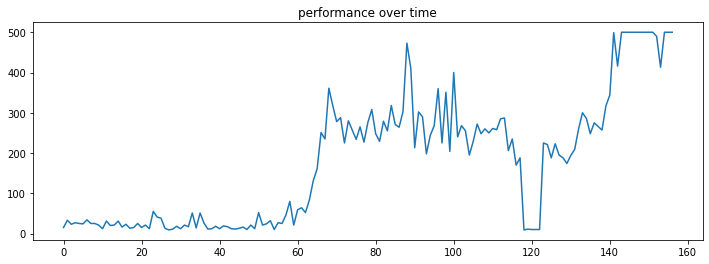

In [38]:

print(results)
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("performance over time" )    
pd.Series([result[1] for result in results]).plot(kind='line')
plt.show()


In [39]:
agent.test()


episode: 0/1000, score: 500
episode: 1/1000, score: 500
episode: 2/1000, score: 500
episode: 3/1000, score: 500
episode: 4/1000, score: 500
episode: 5/1000, score: 500
episode: 6/1000, score: 500
episode: 7/1000, score: 500


KeyboardInterrupt: 

In [50]:
done = False

if not done:
    print("1")
else:
    print("2")


example = [[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4] ]
minibatch = random.sample(example, 3)
print(len(minibatch))




1
3
